- Esta función primero calcula la entropía de la imagen original. 

- Si la entropía es menor que 0.5, sugiere que la imagen podría beneficiarse de la ecualización y muestra la imagen original y la imagen ecualizada. La función devuelve un valor entre 0 y 1, donde valores cercanos a 1 sugieren una fuerte necesidad de ecualización.

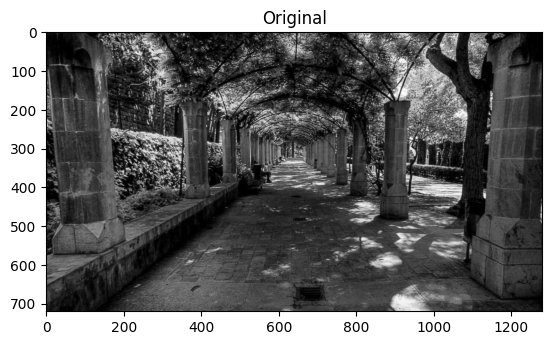

Sugerencia de ecualización: 0.92


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calcular_entropia(imagen):
    histograma = cv2.calcHist([imagen], [0], None, [256], [0,256])
    histograma /= histograma.sum()
    entropia = -np.sum(histograma*np.log2(histograma ))
    return entropia

def sugerir_ecualizacion(imagen_path):
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    entropia_original = calcular_entropia(imagen)
    
    # Normalizar la entropia al rango [0, 1]
    entropia_normalizada = entropia_original / np.log2(256)
    
    # Si la entropía es menor que 0.5, la imagen podría beneficiarse de la ecualización
    if entropia_normalizada < 0.5:
        imagen_ecualizada = cv2.equalizeHist(imagen)
        plt.subplot(1, 2, 1)
        plt.imshow(imagen, cmap='gray')
        plt.title('Original')
        plt.subplot(1, 2, 2)
        plt.imshow(imagen_ecualizada, cmap='gray')
        plt.title('Ecualizada')
        plt.show()
        return 1 - entropia_normalizada
    else:
        plt.imshow(imagen, cmap='gray')
        plt.title('Original')
        plt.show()
        return entropia_normalizada


ruta_imagen = '../imagenes/im1.jpg'
sugerencia = sugerir_ecualizacion(ruta_imagen)
print(f"Sugerencia de ecualización: {sugerencia:.2f}")


![Alt text](mermaid-diagram-2023-08-13-164928.svg)